In [1]:
#Project
#imports
import pandas as pd
import numpy as np
import seaborn as sea
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None
#goal 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
rice = pd.read_csv(r"C:\Users\Jacob\Desktop\Data_Analytics\Project\global-food.csv")
gdp = pd.read_csv("C:/Users/Jacob/Desktop/Data_Analytics/Project/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5358352/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5358352.csv")
cpi = pd.read_csv(r"C:\Users\Jacob\Desktop\Data_Analytics\API_IQ.CPA.TRAN.XQ_DS2_en_csv_v2_5358377\API_IQ.CPA.TRAN.XQ_DS2_en_csv_v2_5358377.csv")

In [3]:
cpi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.805556,2.750000,2.722222,2.694444,2.611111,2.555556,2.611111,2.578947,2.526316,2.555556,2.5,2.50,2.421053,2.5,2.500,2.500,2.473684
2,Afghanistan,AFG,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.00,2.000000,2.0,2.000,2.000,NaN
3,Africa Western and Central,AFW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789474,2.789474,2.815789,2.789474,2.825000,2.850000,2.925000,2.825000,2.875000,2.900000,2.9,2.85,2.875000,2.9,2.925,2.925,2.900000
4,Angola,AGO,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cpi = cpi.drop('Country Code', axis=1)
cpi = cpi.drop('Indicator Name', axis=1)
cpi = cpi.drop('Indicator Code', axis=1)

In [5]:
cpi = pd.melt(cpi, id_vars=['Country Name'], var_name='year', value_name='Corruption')
cpi.head()

,Country Name,year,Corruption
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [6]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,4.486458e+10,4.948110e+10,5.351720e+10,6.960386e+10,8.606157e+10,9.165319e+10,9.112857e+10,1.034200e+11,1.153500e+11,1.346770e+11,1.706620e+11,1.743950e+11,1.672740e+11,1.749260e+11,1.601410e+11,1.363030e+11,1.525250e+11,1.861530e+11,2.041490e+11,2.175480e+11,2.532350e+11,2.734150e+11,2.382660e+11,2.365370e+11,2.401310e+11,2.696490e+11,2.684260e+11,2.821970e+11,2.658260e+11,2.621840e+11,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,5.757220e+11,6.608270e+11,7.081190e+11,7.190950e+11,8.603610e+11,9.642130e+11,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120310e+11,2.110030e+11,1.871640e+11,1.381150e+11,1.142630e+11,1.165070e+11,1.074980e+11,1.103220e+11,1.089430e+11,1.017690e+11,1.218020e+11,1.174570e+11,1.182820e+11,9.882637e+10,8.628174e+10,1.082210e+11,1.257630e+11,1.270640e+11,1.301070e+11,1.375210e+11,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,3.956560e+11,4.644260e+11,5.664790e+11,5.070300e+11,5.971290e+11,6.804560e+11,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169953e+10,1.094370e+11,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,

In [7]:
# Drop a single column by name
gdp = gdp.drop('Country Code', axis=1)
gdp = gdp.drop('Indicator Name',axis = 1)
gdp = gdp.drop('Indicator Code', axis=1)
gdp.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,4.486458e+10,4.948110e+10,5.351720e+10,6.960386e+10,8.606157e+10,9.165319e+10,9.112857e+10,1.034200e+11,1.153500e+11,1.346770e+11,1.706620e+11,1.743950e+11,1.672740e+11,1.749260e+11,1.601410e+11,1.363030e+11,1.525250e+11,1.861530e+11,2.041490e+11,2.175480e+11,2.532350e+11,2.734150e+11,2.382660e+11,2.365370e+11,2.401310e+11,2.696490e+11,2.684260e+11,2.821970e+11,2.658260e+11,2.621840e+11,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,5.757220e+11,6.608270e+11,7.081190e+11,7.190950e+11,8.603610e+11,9.642130e+11,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120310e+11,2.110030e+11,1.871640e+11,1.381150e+11,1.142630e+11,1.165070e+11,1.074980e+11,1.103220e+11,1.089430e+11,1.017690e+11,1.218020e+11,1.174570e+11,1.182820e+11,9.882637e+10,8.628174e+10,1.082210e+11,1.257630e+11,1.270640e+11,1.301070e+11,1.375210e+11,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,3.956560e+11,4.644260e+11,5.664790e+11,5.070300e+11,5.971290e+11,6.804560e+11,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169953e+10,1.094370e+11,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


In [8]:
gdp = pd.melt(gdp, id_vars=['Country Name'], var_name='year', value_name='GDP')
gdp.head()

,Country Name,year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,2.129152e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.040414e+10
4,Angola,1960,NaN


In [9]:
# Merge the two dataframes on 'Country Name' and 'Year'
merged_df = pd.merge(gdp, cpi, on=['Country Name', 'year'], how = 'inner')

In [10]:
merged_df.head()

,Country Name,year,GDP,Corruption
0,Aruba,1960,NaN,NaN
1,Africa Eastern and Southern,1960,2.129152e+10,NaN
2,Afghanistan,1960,5.377778e+08,NaN
3,Africa Western and Central,1960,1.040414e+10,NaN
4,Angola,1960,NaN,NaN


In [11]:
rice.head()

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (m²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,319000.0,0.036291,36.290660,1.5190,NaN,210000.0,0.023890,238.90404,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.024232,24.231697,183000.0,0.020819,20.818781,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001706,1.706457,20.841400,57.099725,212.89604,4.074565,0.397270
1,NaN,Afghanistan,1962,8969055.0,319000.0,0.035567,35.566736,1.5190,NaN,210000.0,0.023414,234.13839,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023748,23.748321,183000.0,0.020403,20.403488,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001672,1.672417,20.426420,55.962794,208.95290,3.995587,0.397520
2,NaN,Afghanistan,1963,9157463.0,319000.0,0.034835,34.834977,1.5190,NaN,210000.0,0.022932,229.32116,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023260,23.259718,182000.0,0.019874,19.874500,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001638,1.638008,19.929495,54.601356,202.96669,3.896145,0.387575
3,NaN,Afghanistan,1964,9355510.0,380000.0,0.040618,40.617775,1.7273,NaN,220000.0,0.023516,235.15554,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.027043,27.042886,220000.0,0.023516,23.515554,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001924,1.924000,23.552404,64.527134,240.83049,4.602312,0.449006
4,NaN,Afghanistan,1965,9565154.0,380000.0,0.039728,39.727535,1.7273,NaN,220000.0,0.023000,230.00153,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.026450,26.450176,220000.0,0.023000,23.000153,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001882,1.881831,23.021140,63.071616,234.80542,4.502139,0.438984


In [12]:
rice = rice.rename(columns={'Country': 'Country Name'})
rice = rice.rename(columns={'Year': 'year'})
rice.head()

,Product,Country Name,year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (m²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,319000.0,0.036291,36.290660,1.5190,NaN,210000.0,0.023890,238.90404,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.024232,24.231697,183000.0,0.020819,20.818781,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001706,1.706457,20.841400,57.099725,212.89604,4.074565,0.397270
1,NaN,Afghanistan,1962,8969055.0,319000.0,0.035567,35.566736,1.5190,NaN,210000.0,0.023414,234.13839,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023748,23.748321,183000.0,0.020403,20.403488,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001672,1.672417,20.426420,55.962794,208.95290,3.995587,0.397520
2,NaN,Afghanistan,1963,9157463.0,319000.0,0.034835,34.834977,1.5190,NaN,210000.0,0.022932,229.32116,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023260,23.259718,182000.0,0.019874,19.874500,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001638,1.638008,19.929495,54.601356,202.96669,3.896145,0.387575
3,NaN,Afghanistan,1964,9355510.0,380000.0,0.040618,40.617775,1.7273,NaN,220000.0,0.023516,235.15554,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.027043,27.042886,220000.0,0.023516,23.515554,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001924,1.924000,23.552404,64.527134,240.83049,4.602312,0.449006
4,NaN,Afghanistan,1965,9565154.0,380000.0,0.039728,39.727535,1.7273,NaN,220000.0,0.023000,230.00153,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.026450,26.450176,220000.0,0.023000,23.000153,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001882,1.881831,23.021140,63.071616,234.80542,4.502139,0.438984


In [13]:
rice = rice[['Country Name', 'year','Population','Production (t)']]
rice.head()

,Country Name,year,Population,Production (t)
0,Afghanistan,1961,8790140.0,319000.0
1,Afghanistan,1962,8969055.0,319000.0
2,Afghanistan,1963,9157463.0,319000.0
3,Afghanistan,1964,9355510.0,380000.0
4,Afghanistan,1965,9565154.0,380000.0


In [14]:
rice['year'] = rice['year'].astype(str)

In [15]:
df = pd.merge(merged_df, rice, on=['Country Name', 'year'] , how = 'inner')

In [16]:
df.head()
df = df.rename(columns={'Production (t)': 'production'})

In [17]:
df = df.drop('Country Name',axis =1)

In [18]:
# Drop missing values from DataFrame
#df.dropna()
#df

In [63]:
df.head()

,year,GDP,Corruption,Population,production
6158,2005,-0.141614,-0.441022,-0.162818,-0.185202
6159,2005,-0.144403,0.421461,-0.178991,-0.185288
6162,2005,-0.144706,-0.441022,-0.178976,-0.185288
6166,2005,-0.143902,-0.441022,-0.173451,-0.185206
6167,2005,-0.145071,0.421461,-0.174700,-0.184616


In [64]:
feature_names = ['Year' , 'GDP' , 'Corruption' , 'Population' ]

In [65]:
df2 = df.drop('year',axis =1)
df2 = df2.drop('Population' , axis=1)

In [66]:
df = df.dropna()

In [67]:
# Selecting the columns to be scaled
columns_to_scale = ['GDP','Corruption','Population','production']

# Creating a StandardScaler object
scaler = StandardScaler()

# Scaling the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [68]:
# Drop missing values from DataFrame
#df.dropna(axis = 1 , inplace = True)
# Splitting the data into independent and dependent variables
X = df.drop('production', axis=1)
y = df['production']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fit logistic regression model

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict binary score using test set
y_pred = model.predict(X_test)
# Access the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the coefficients and intercept
print("Intercept:", intercept)
for i in range(len(X.columns)):
    print(X.columns[i], coefficients[i])

# Access the R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)
r2 = r2_score(y_test, y_pred)
print('R-squared: ',r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE: " , mse)

#accuracy = accuracy_score(y_test, y_pred)
#print('Accuracy:', accuracy)

Intercept: 0.7340452824758563
year -0.00036418295214233655
GDP -0.10456529845535484
Corruption 0.000503536113654748
Population 1.1049046488551213
R-squared: 0.9939357834088958
R-squared:  0.9911876207185828
MSE:  0.007086435690782068


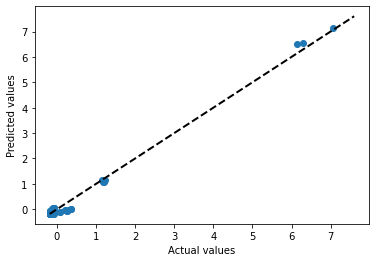

In [26]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
# Creating a DecisionTreeRegressor object and fitting the model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Making predictions
y_pred = dtr.predict(X_test)

# Calculating the mean squared error of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print("R-squared:", r2)

Mean Squared Error: 0.0008810420770965052
R-squared: 0.998904374881104


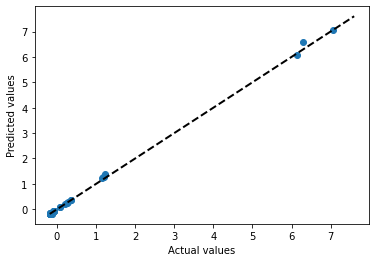

In [28]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

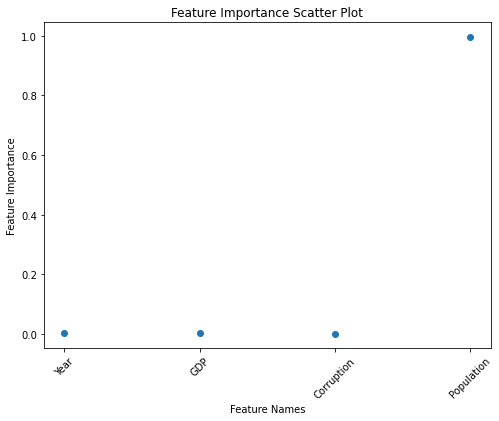

In [29]:
# Get feature importances
importances = dtr.feature_importances_

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(feature_names, rotation=45)
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Feature Names')
plt.title('Feature Importance Scatter Plot')
plt.show()

In [30]:
# Create a Random Forest Regressor model with 100 trees
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r_squared)

Mean squared error: 0.0015389564491364066
R-squared: 0.9939357834088958


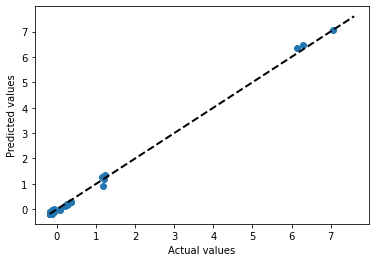

In [31]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

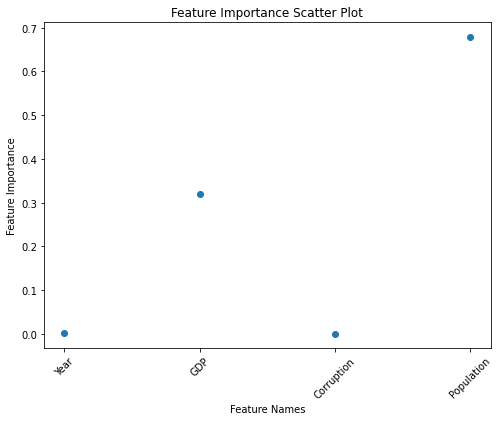

In [32]:
# Get feature importances
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor


# Get feature importances
importances = rf.feature_importances_

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(feature_names, rotation=45)
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Feature Names')
plt.title('Feature Importance Scatter Plot')
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
k = 2# number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 0.024573378961952507
R-squared: 0.9694416283322224


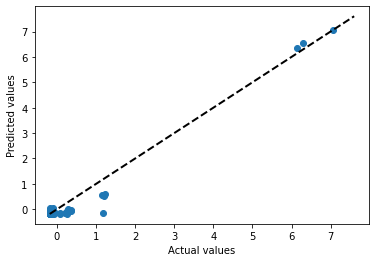

In [34]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

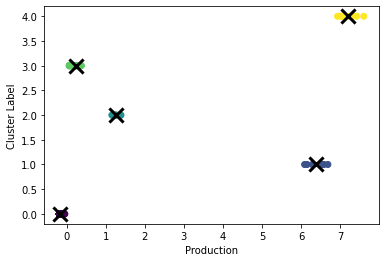

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the 'score' column from the employ dataset
X = df[['production']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Production')
plt.ylabel('Cluster Label')
plt.show()

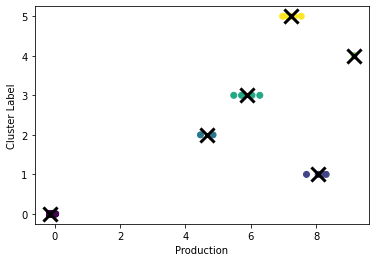

In [36]:
# Extract the 'score' column from the employ dataset
X = df[['GDP']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=6)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4,5], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Production')
plt.ylabel('Cluster Label')
plt.show()

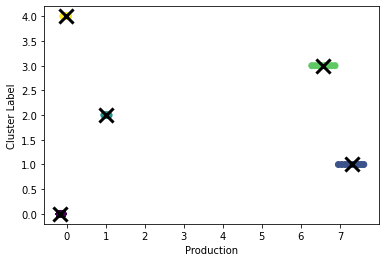

In [37]:
# Extract the 'score' column from the employ dataset
X = df[['Population']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Production')
plt.ylabel('Cluster Label')
plt.show()

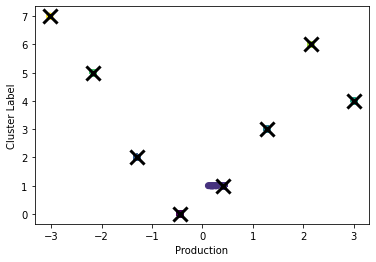

In [38]:
# Extract the 'score' column from the employ dataset
X = df[['Corruption']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=8)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4,5,6,7], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Production')
plt.ylabel('Cluster Label')
plt.show()

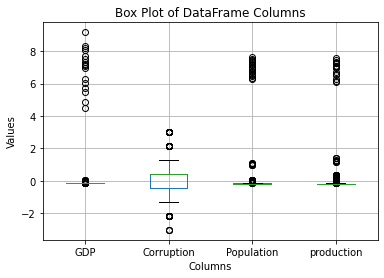

In [39]:
# create box plot
df.boxplot()

# set plot title and axis labels
plt.title('Box Plot of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# show plot
plt.show()

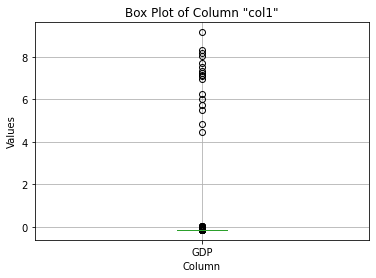

In [40]:
# create box plot of col1
df.boxplot(column='GDP')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

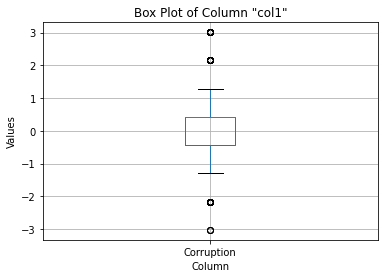

In [41]:
# create box plot of col1
df.boxplot(column='Corruption')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

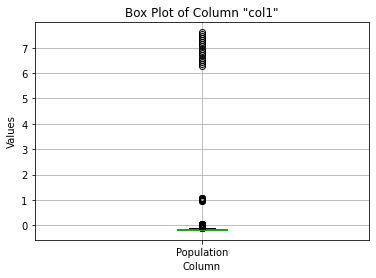

In [42]:
# create box plot of col1
df.boxplot(column='Population')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

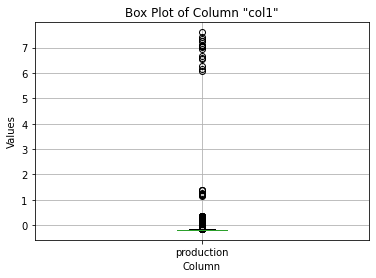

In [43]:
# create box plot of col1
df.boxplot(column='production')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

In [44]:
# calculate summary statistics
summary = df.describe()

# print summary statistics
print(summary)

                GDP    Corruption    Population    production
count  8.560000e+02  8.560000e+02  8.560000e+02  8.560000e+02
mean  -1.212685e-17  5.800137e-16  2.315126e-17  1.867665e-17
std    1.000585e+00  1.000585e+00  1.000585e+00  1.000585e+00
min   -1.451256e-01 -3.028470e+00 -1.815028e-01 -1.852878e-01
25%   -1.445626e-01 -4.410221e-01 -1.744322e-01 -1.846230e-01
50%   -1.439033e-01  4.214606e-01 -1.676131e-01 -1.832727e-01
75%   -1.419493e-01  4.214606e-01 -1.538826e-01 -1.715675e-01
max    9.161527e+00  3.008908e+00  7.608937e+00  7.602730e+00


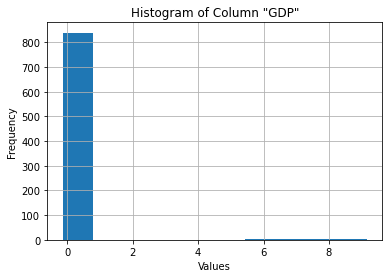

In [45]:
# create histogram of col1
df['GDP'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "GDP"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

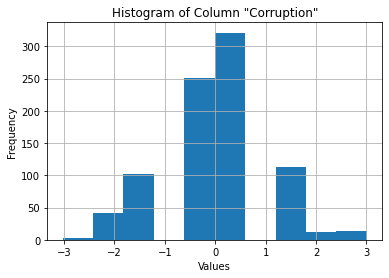

In [46]:
# create histogram of col1
df['Corruption'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "Corruption"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

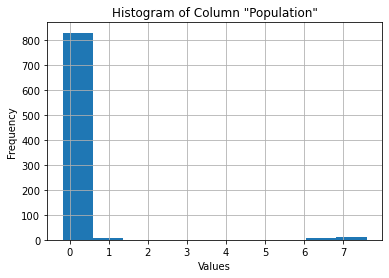

In [47]:
# create histogram of col1
df['Population'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "Population"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

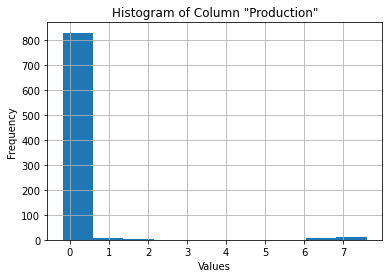

In [48]:
# create histogram of col1
df['production'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "Production"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

In [69]:
df2 = df2.dropna()
# Selecting the columns to be scaled
columns_to_scale = ['GDP','Corruption']

# Creating a StandardScaler object
scaler = StandardScaler()

# Scaling the selected columns
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [70]:
X = df2.drop('production', axis=1)
y = df2['production']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [71]:
# Fit logistic regression model

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict binary score using test set
y_pred = model.predict(X_test)
# Access the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the coefficients and intercept
print("Intercept:", intercept)
for i in range(len(X.columns)):
    print(X.columns[i], coefficients[i])

# Access the R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)
r2 = r2_score(y_test, y_pred)
print('R-squared: ',r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE: " , mse)

Intercept: -0.0060456291839449
GDP 0.9635434476420348
Corruption 0.012829384368447464
R-squared: 0.9621598964173212
R-squared:  0.9240397248133755
MSE:  0.06108311818798147


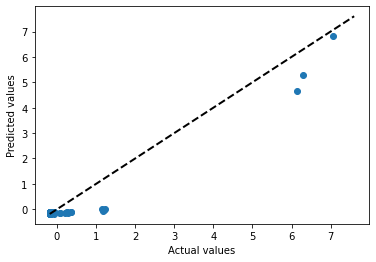

In [72]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [73]:
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r_squared)

Mean squared error: 0.014672232417350358
R-squared: 0.9621598964173212


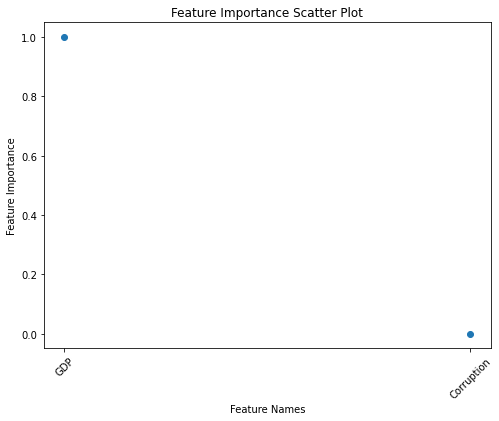

In [62]:
# Get feature importances
importances = rf.feature_importances_

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(['GDP','Corruption'], rotation=45)
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Feature Names')
plt.title('Feature Importance Scatter Plot')
plt.show()